In [2]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from plotnine import *
from plotnine import ggplot
from collections import Counter
from sklearn.decomposition import PCA
%matplotlib inline
import plotly.express as px
import nbformat


In [54]:
df = pd.read_csv("Data Science Project - masterclean.csv")

dataset=df.copy()
dataset2=df.copy()
    
###don't need to normalize the values ​​because everything is discrete values.


<AxesSubplot: >

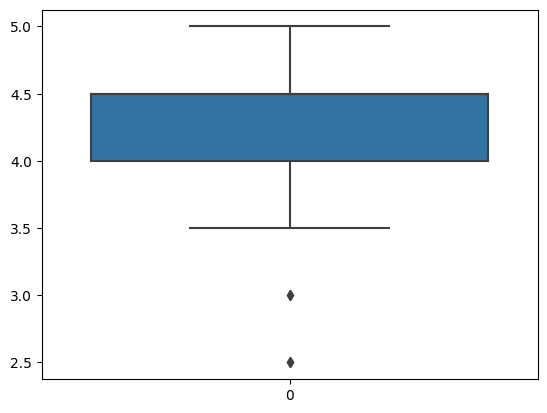

In [55]:
sns.boxplot(dataset.Rating)
###As you can see most of the restaurants are rated between 4 and 4.5 stars


-0.031902769453357786

<Figure size 5000x2000 with 0 Axes>

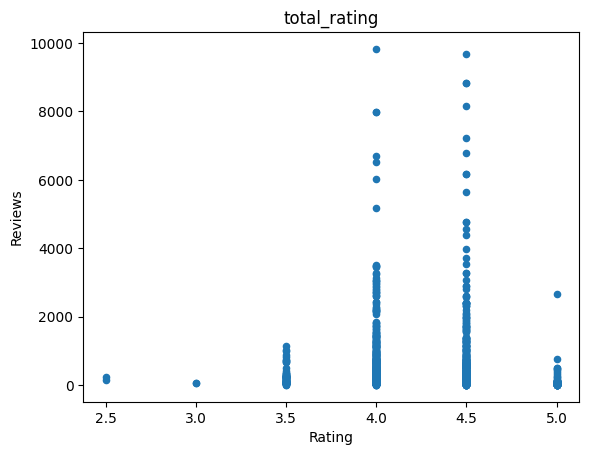

In [56]:
fig = plt.figure(figsize=(50,20))
dataset.loc[:,['Rating','Reviews']].plot(title='total_rating',x='Rating',y='Reviews',kind='scatter')

dataset['Rating'].corr(dataset['Reviews'])
###As you can see there is no connection between the rating of the restaurant and the reviews it received


0.05692231865432478

<Figure size 5000x2000 with 0 Axes>

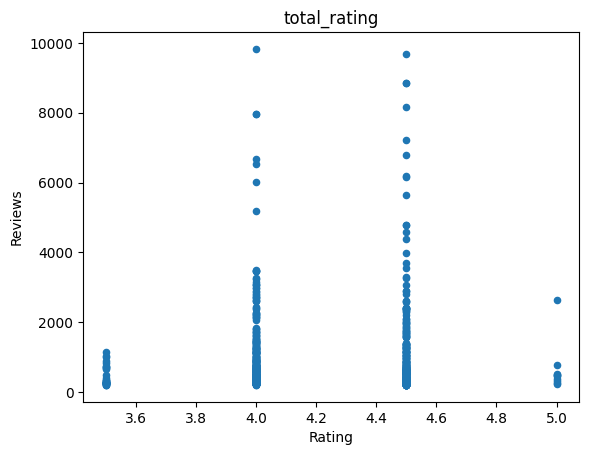

<Figure size 5000x2000 with 0 Axes>

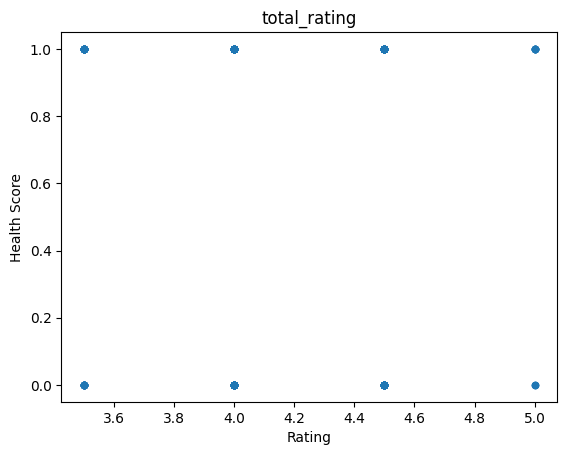

In [57]:
dataset=dataset.loc[dataset['Rating']>3]
dataset=dataset.loc[dataset['Reviews']>200]

fig = plt.figure(figsize=(50,20))
dataset.loc[:,['Rating','Reviews']].plot(title='total_rating',x='Rating',y='Reviews',kind='scatter')
dataset['Rating'].corr(dataset['Reviews'])

fig = plt.figure(figsize=(50,20))
dataset.loc[:,['Rating','Health Score']].plot(title='total_rating',x='Rating',y='Health Score',kind='scatter')
dataset['Rating'].corr(dataset['Health Score'])
###As you can see there is no connection between the health rating and the rating of the restaurant


Index(['Unnamed: 0', 'Reviews', 'Rating', 'Health Score', 'Takes Reservations',
       'Offers Takeout', 'Proof of vaccination required',
       'All staff fully vaccinated', 'Accepts Credit Cards', 'Street Parking',
       'Outdoor Seating', 'Offers Delivery', 'Staff wears masks',
       'Vegan Options', 'Many Vegetarian Options', 'Classy', 'Casual',
       'Moderate Noise', 'Good for Groups', 'Good For Kids', 'Good for Lunch',
       'Garage Parking', 'Waiter Service', 'Beer & Wine Only',
       'Provides reusable tableware'],
      dtype='object')
1     4.5
2     4.5
8     4.0
9     4.0
11    4.5
Name: Rating, dtype: float64
RangeIndex(start=0, stop=627, step=1)


<AxesSubplot: >

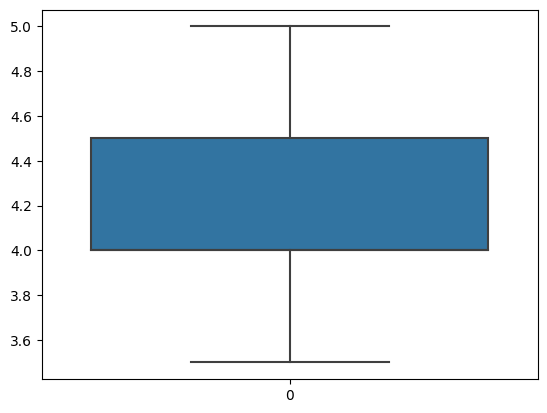

In [58]:
#print(dataset)
pd.set_option('display.max_columns', 30) # set maximum number of columns to 30

print(dataset.columns)

print(dataset['Rating'].head())
dataset = dataset.reset_index(drop=True)
print(dataset.index)
dataset=dataset.loc[dataset['Rating']>0]
sns.boxplot(dataset.Rating)


0.11189226784934138

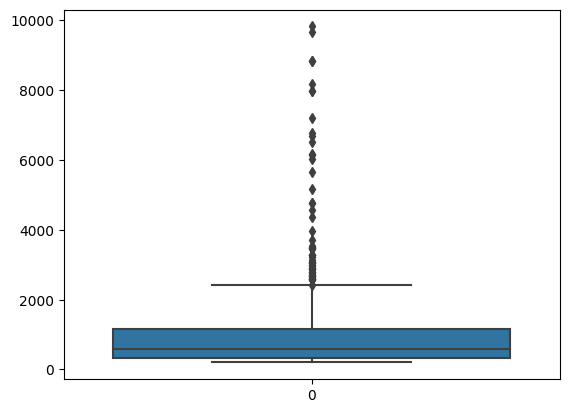

In [59]:
sns.boxplot(dataset.Reviews)
dataset['Health Score'].corr(dataset['Reviews'])
###There is no connection between the restaurant's reviews and its health rating


<AxesSubplot: ylabel='Frequency'>

<Figure size 2000x1000 with 0 Axes>

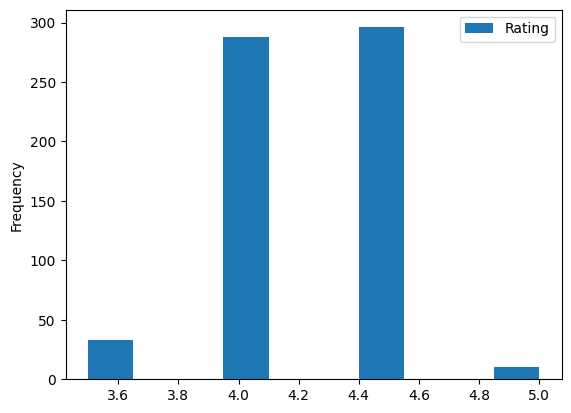

<Figure size 2000x1000 with 0 Axes>

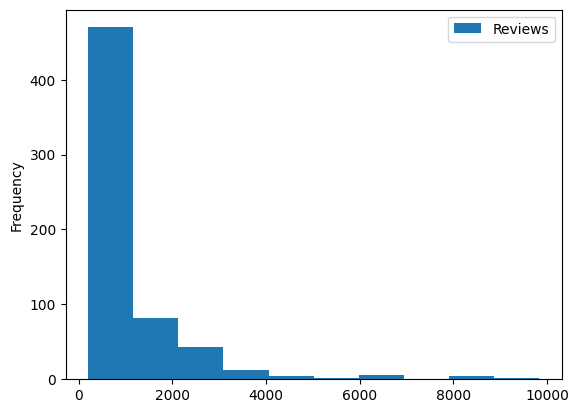

In [79]:

fig = plt.figure(figsize=(20,10))
dataset.plot(x='Reviews',y='Rating',kind='hist')
fig = plt.figure(figsize=(20,10))
dataset.plot(x='Health Score',y='Reviews',kind='hist')

In [80]:
fig=px.pie(dataset, values='Rating', names='Rating',
          title="Top 10 Rating")
fig.update_traces(textposition='inside', textinfo='label')
fig.show()


-0.05102950878854261

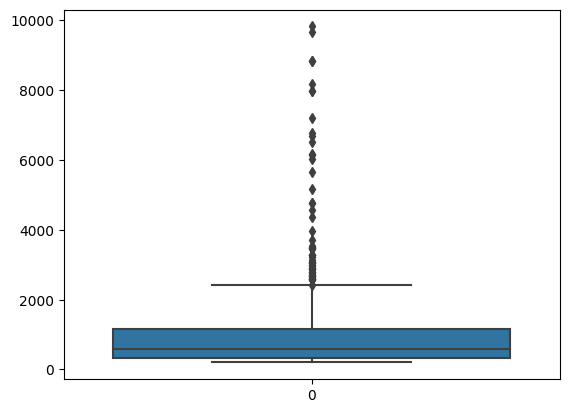

In [81]:
sns.boxplot(dataset.Reviews)
dataset['Many Vegetarian Options'].corr(dataset['Rating'])
###Vegan food options do not affect the restaurant rating


-0.03857675149138287

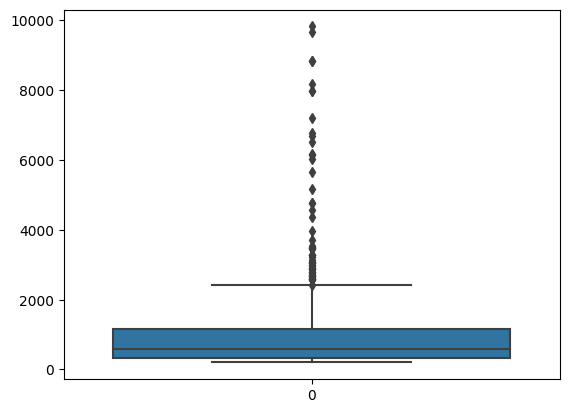

In [82]:
sns.boxplot(dataset.Reviews)
dataset['Takes Reservations'].corr(dataset['Rating'])
###Taking reservations in advance does not affect the rating of the restaurants


In [84]:
px.histogram(dataset, x='Health Score', y='Reviews', color='Rating',
            title="Health")
px.histogram(dataset, x='Rating', y='Reviews', color='Rating',
            title="Total rating")

In [85]:
mean=df.Rating.mean()
df.Reviews.mean()


612.7823008849557

<AxesSubplot: >

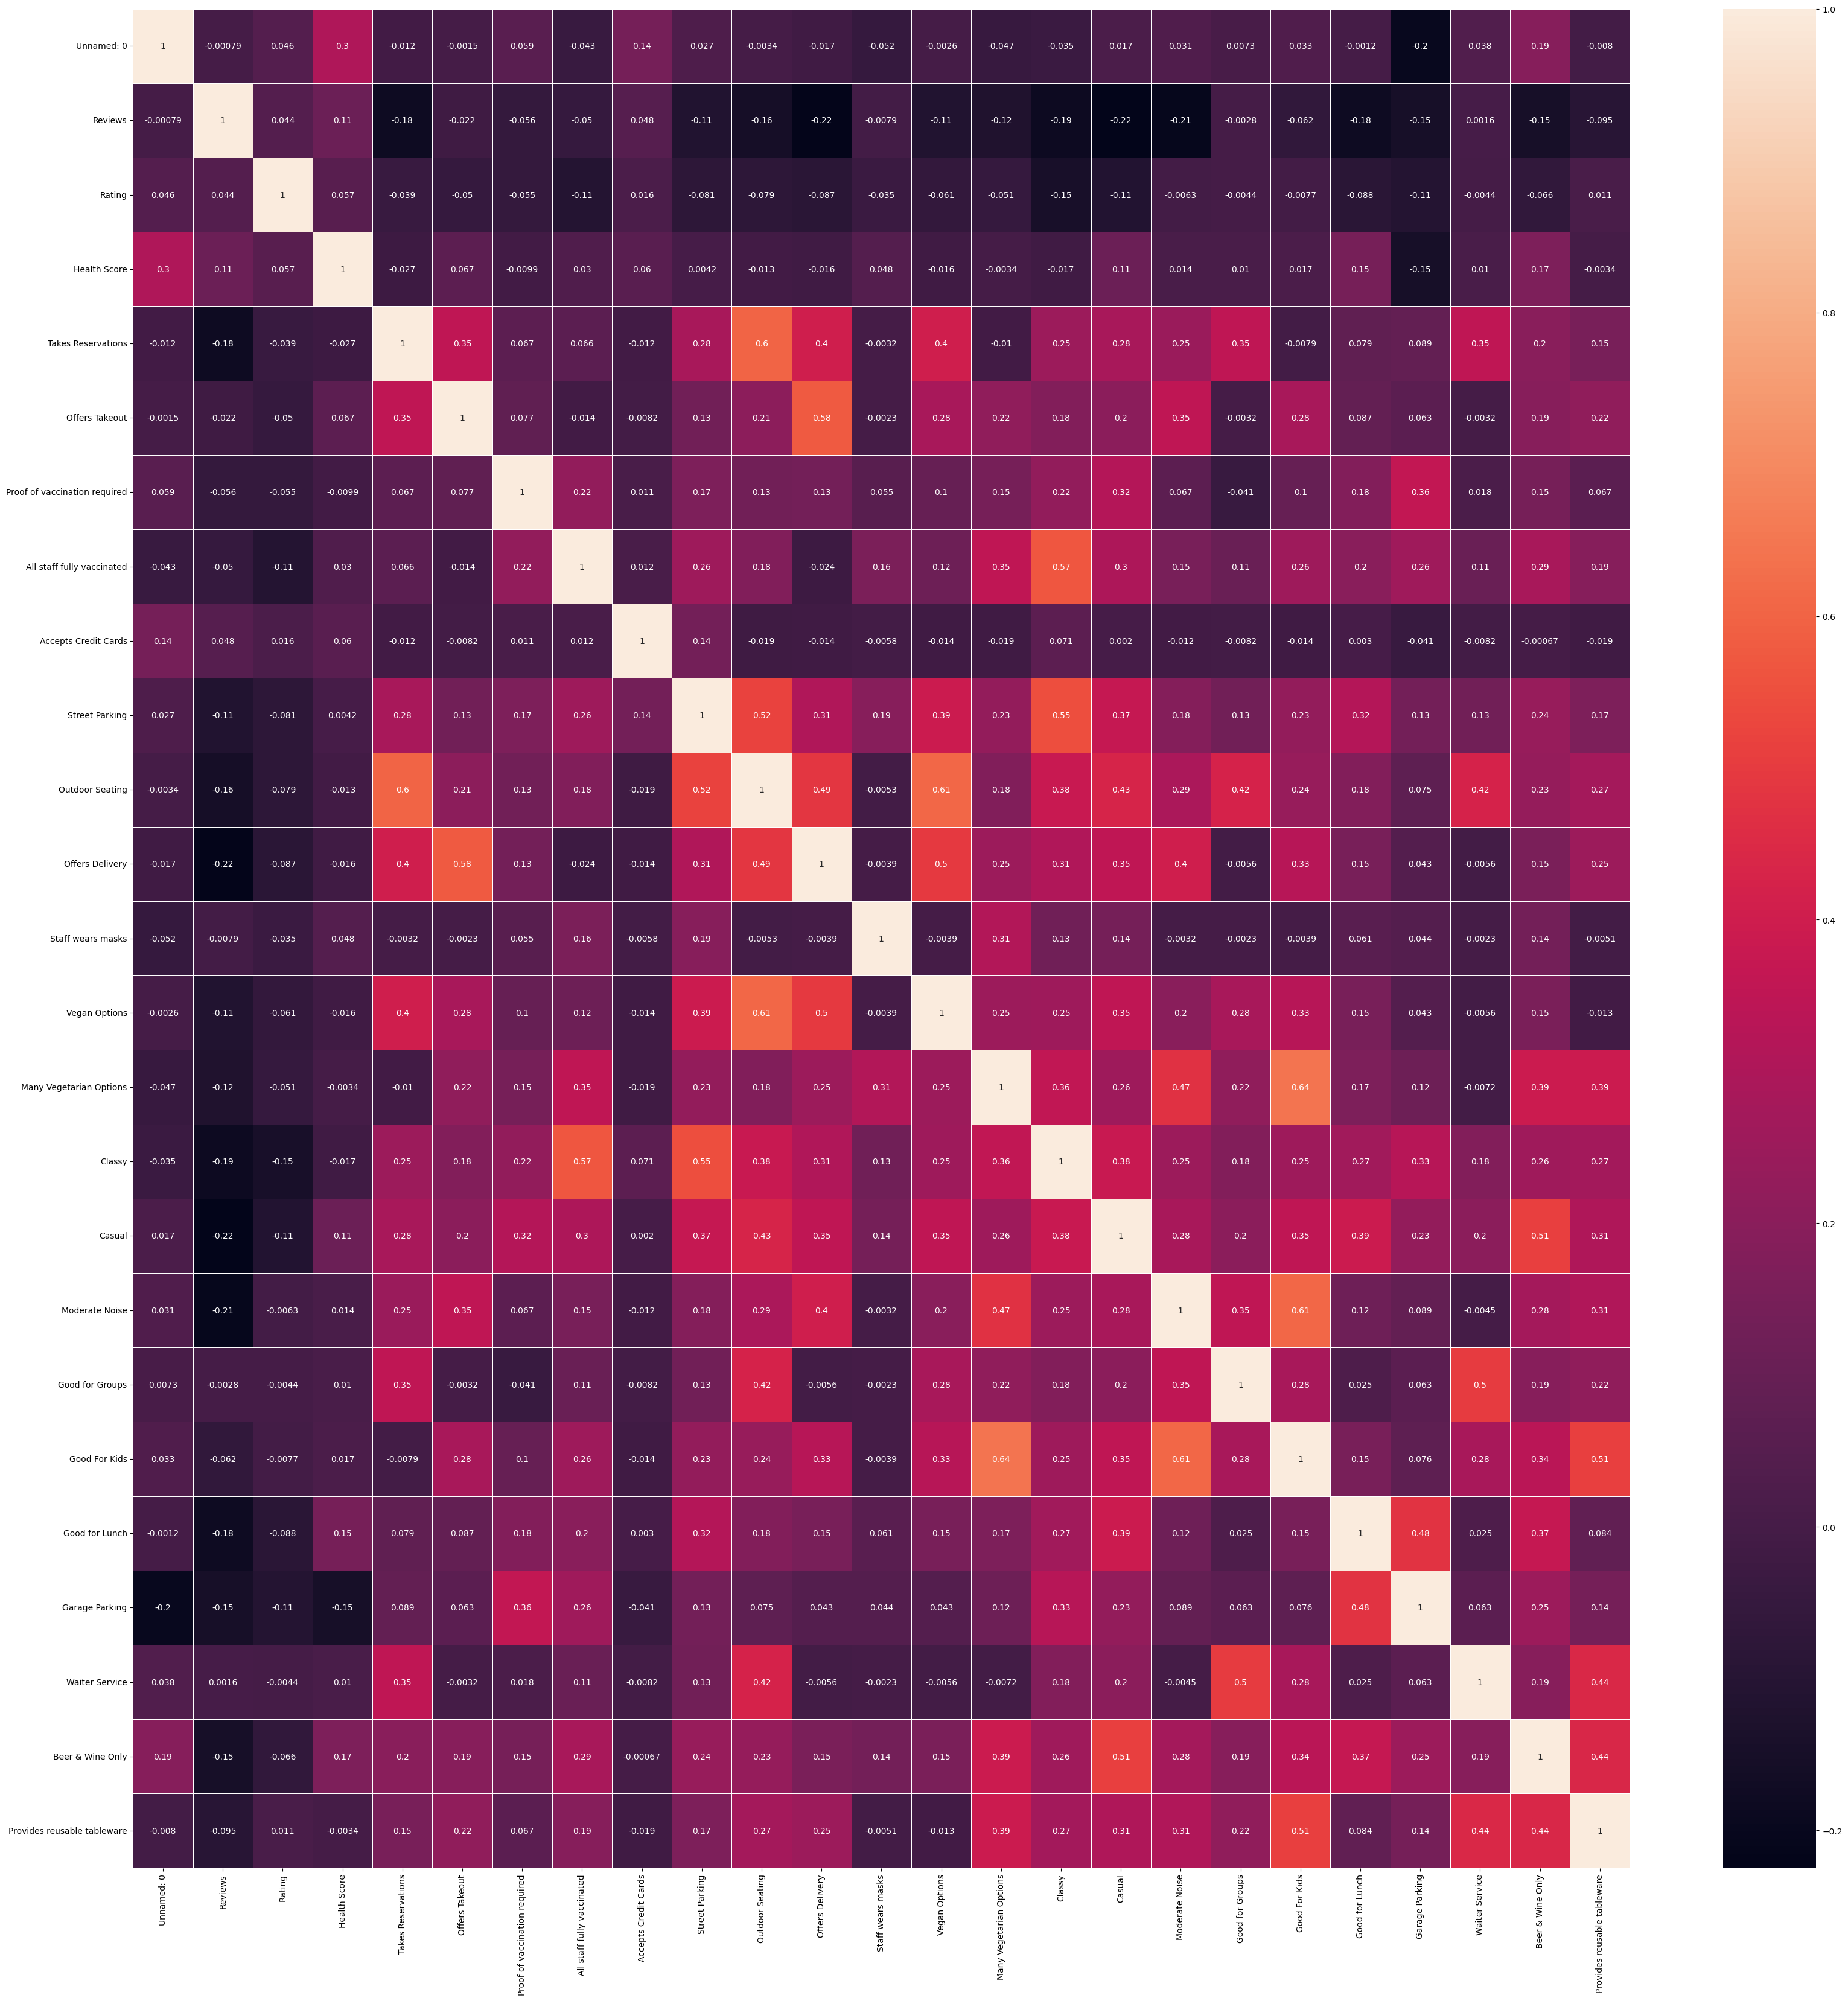

In [86]:
corr=dataset.corr(method ='pearson')

fig, ax = plt.subplots(figsize=(40,40))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
###As you can see below, there really isn't a strong enough connection between the various parameters that affect the restaurant's rating


<AxesSubplot: >

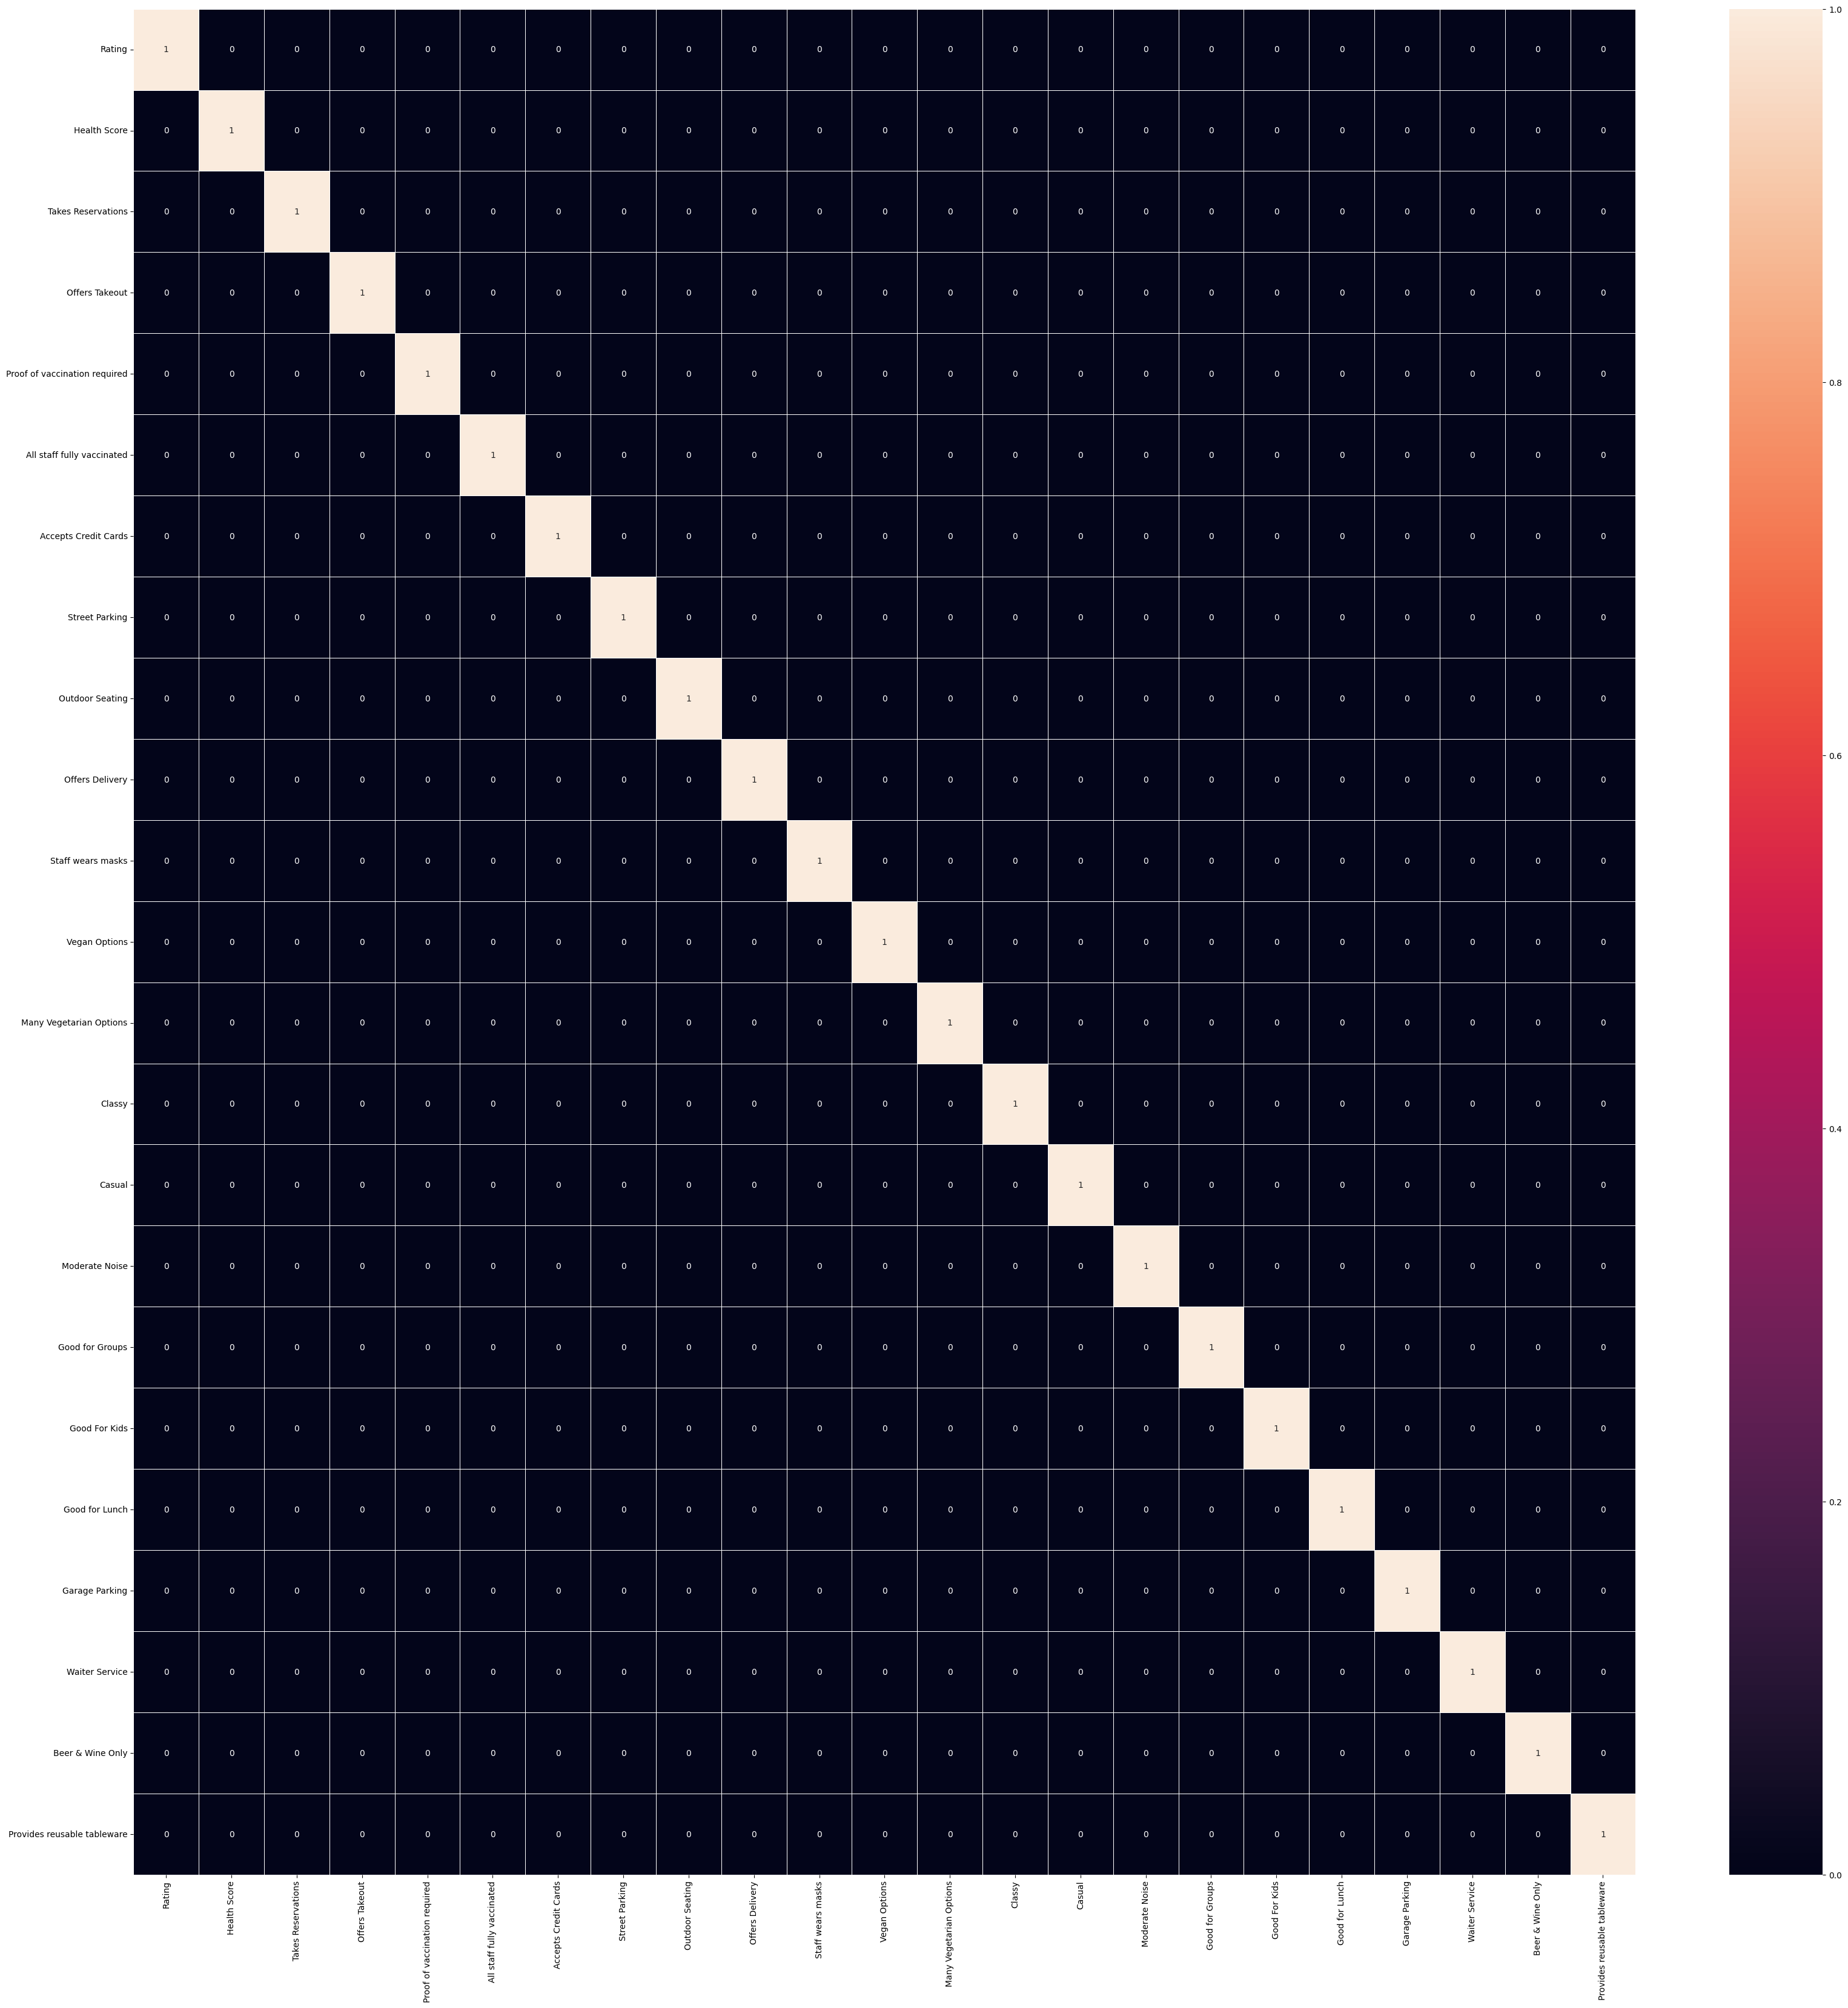

In [87]:
corr=dataset.iloc[:,2:].corr(method ='pearson')

fig, ax = plt.subplots(figsize=(40,40))         # Sample figsize in inches
sns.heatmap(corr>=0.7, annot=True, linewidths=.5, ax=ax)


<AxesSubplot: >

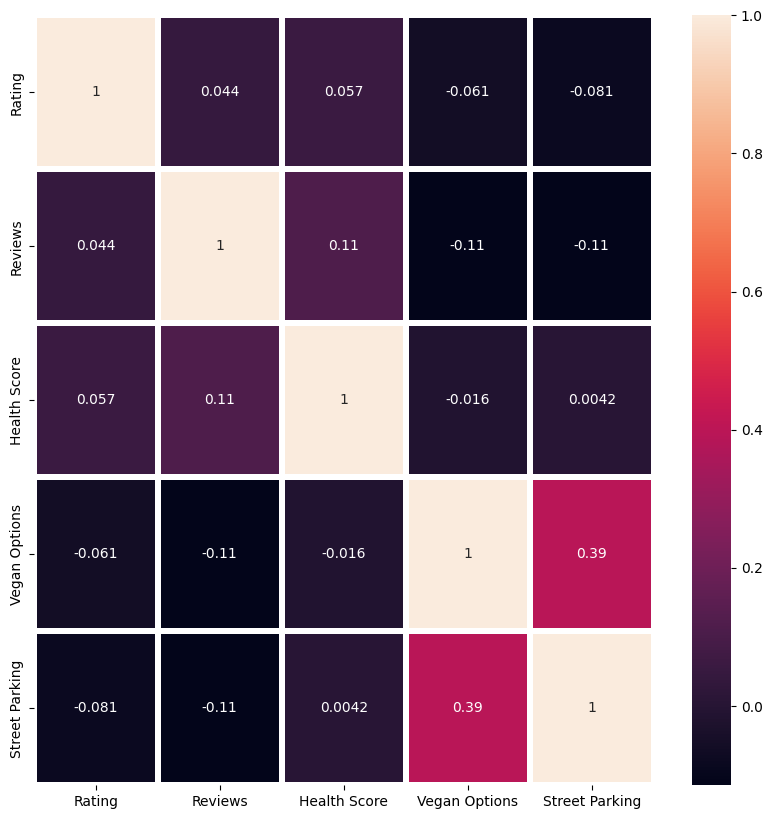

In [89]:
corr=dataset[['Rating','Reviews','Health Score','Vegan Options','Street Parking']].corr(method ='pearson')

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=4, ax=ax)
###There is no real correlation even after checking the average


<AxesSubplot: >

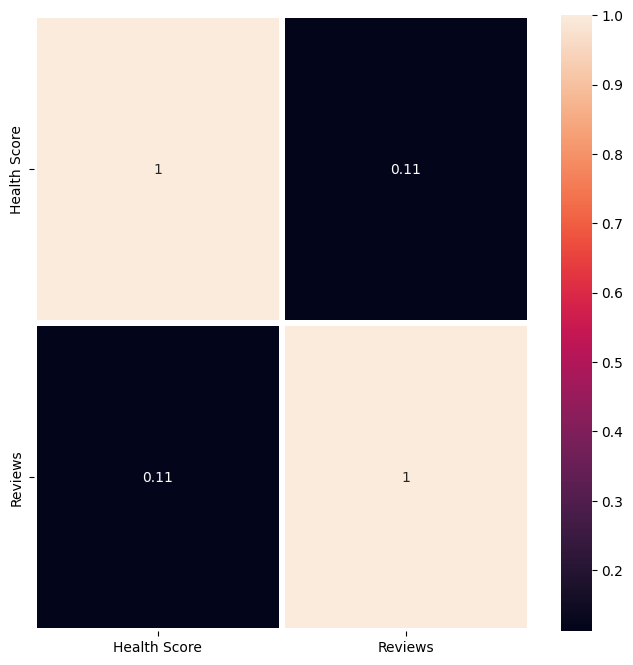

In [90]:
corr=dataset[['Health Score','Reviews']].corr(method ='pearson')

fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=4, ax=ax)
###There is no real correlation even after averaging between the amount of reviews and its health rating


<AxesSubplot: >

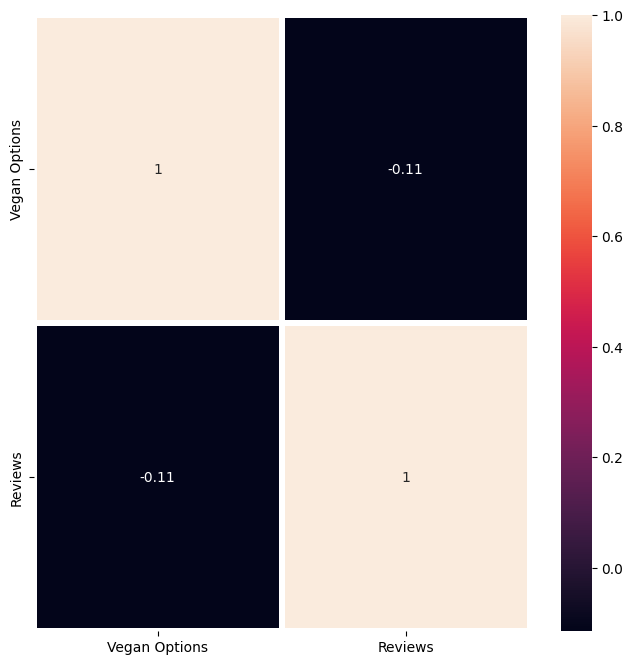

In [91]:
corr=dataset[['Vegan Options','Reviews']].corr(method ='pearson')

fig, ax = plt.subplots(figsize=(8,8))         
sns.heatmap(corr, annot=True, linewidths=4, ax=ax)

<AxesSubplot: >

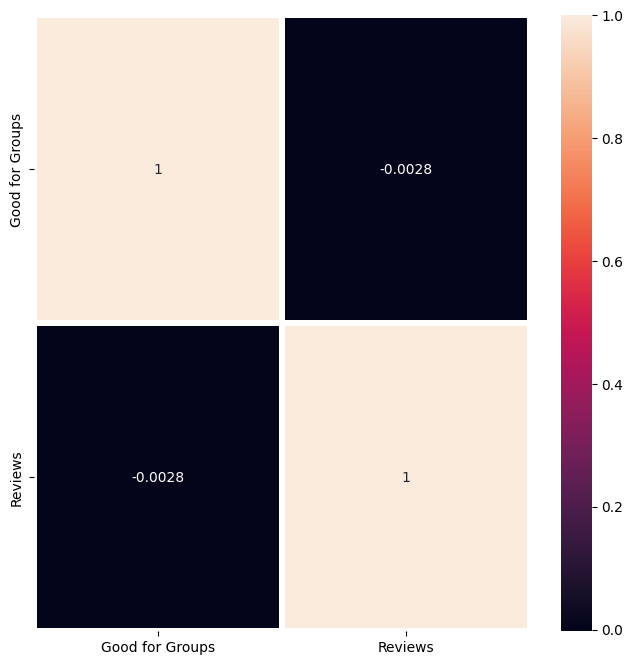

In [92]:
corr=dataset[['Good for Groups','Reviews']].corr(method ='pearson')

fig, ax = plt.subplots(figsize=(8,8))        
sns.heatmap(corr, annot=True, linewidths=4, ax=ax)

<AxesSubplot: >

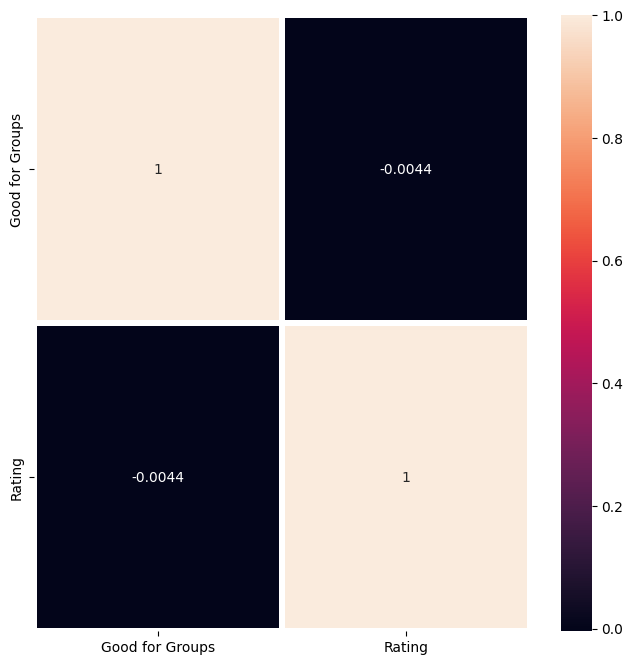

In [93]:
corr=dataset[['Good for Groups','Rating']].corr(method ='pearson')

fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=4, ax=ax)

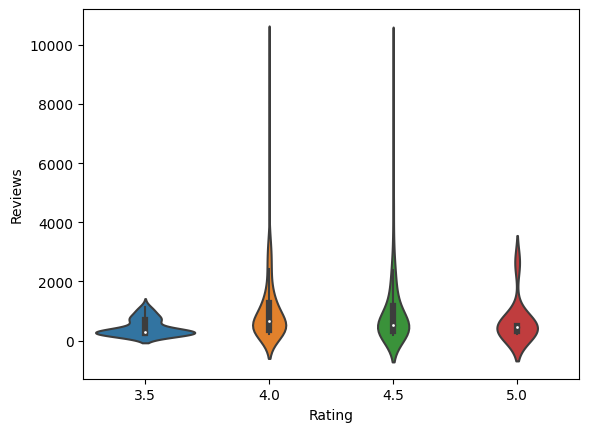

In [94]:
sns.violinplot(x='Rating', y='Reviews', data=dataset)
plt.show()


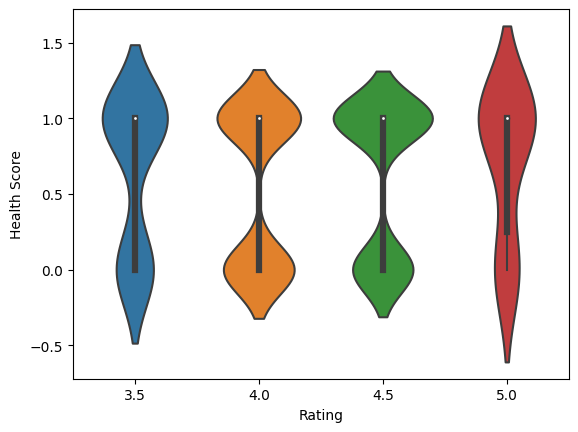

In [95]:
sns.violinplot(x='Rating', y='Health Score', data=dataset)
plt.show()
### There is no real correlation 
